<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/Ch1_EVS/Colabs/Ch1_EVS_3_protocol_EVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)



---


In this notebook, we will follow the protocol of extreme events predictions and apply that protocol to two diamond datasets. We will answer this question:

`What is the probability of observing a stone larger than 40ct? `


**Expected learning outcomes**:   
You will learn how to use the extreme value theory we learned to make predictions! 






In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Load two diamond datasets

In [ ]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 369 (delta 83), reused 116 (delta 48), pack-reused 203
Receiving objects: 100% (369/369), 48.63 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (169/169), done.


In [ ]:
# Load 2 diamond datasets: size for each mined diamond
# For your own dataset, you can click Files on the left bar, and upload your dataset
## Diamond dataset 1, number of diamonds: 1,000
diamond_dataset1 = np.loadtxt('/content/DataScienceForGeosciences/Ch1_EVS/diamond_dataset_1.txt')
## Diamond dataset 2, number of diamonds: 500
diamond_dataset2 = np.loadtxt('/content/DataScienceForGeosciences/Ch1_EVS/diamond_dataset_2.txt')

# Plot 1: Histogram of data with summary statistics

## Histogram

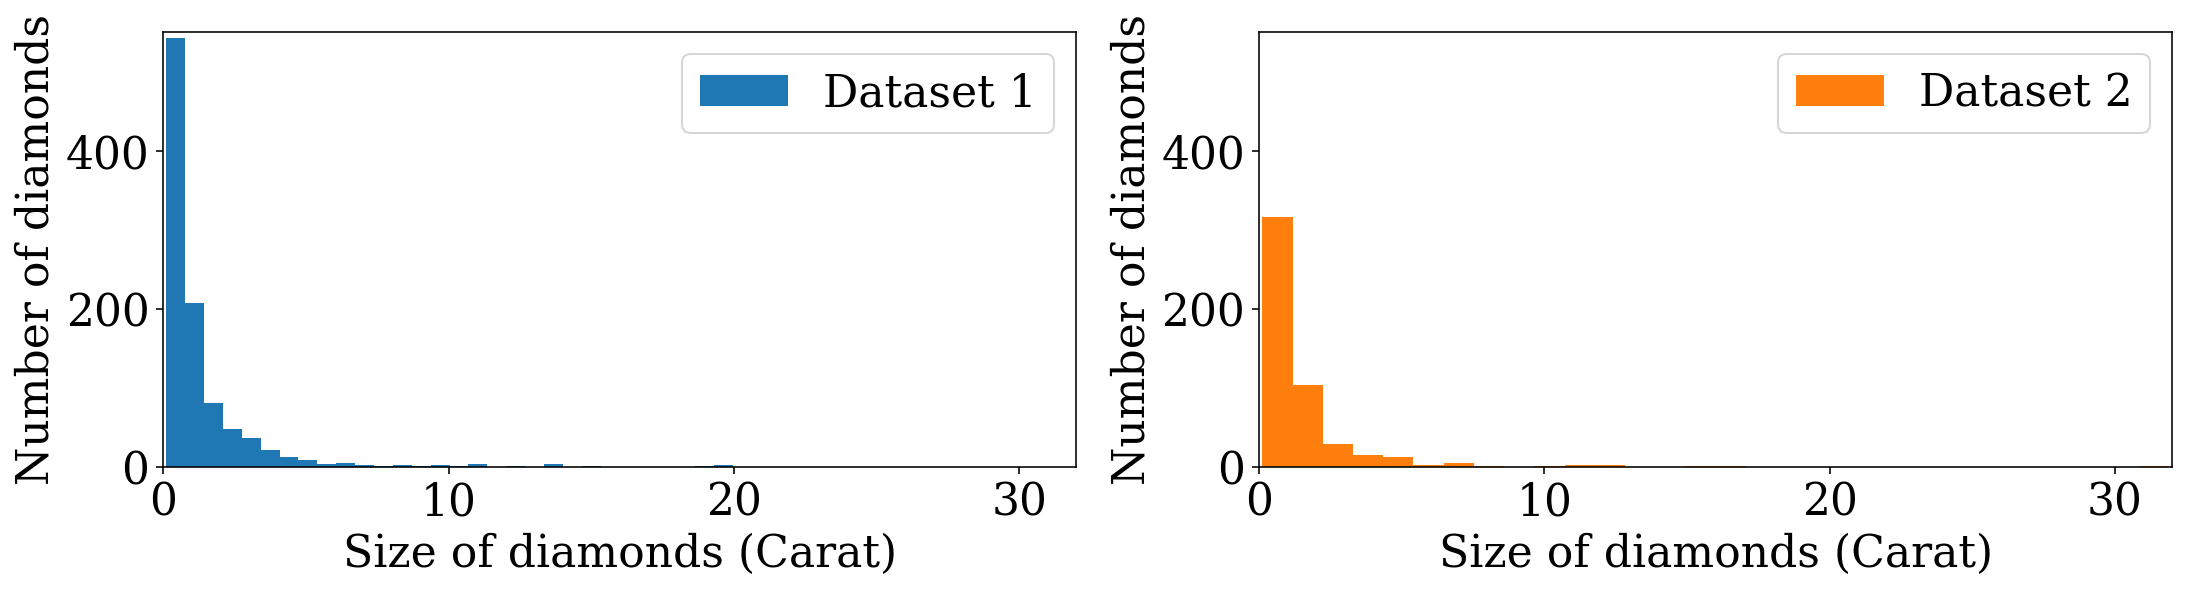

In [ ]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize = [18,4])
ax = plt.subplot(1, 2, 1)
plt.hist(diamond_dataset1,bins = 30,alpha = 1,label = 'Dataset 1')
plt.xlim(0,32)
plt.ylim(0,550)

plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.legend()
ax = plt.subplot(1, 2, 2)
plt.hist(diamond_dataset2,bins = 30,alpha = 1,label = 'Dataset 2',color = 'C1')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.xlim(0,32)
plt.ylim(0,550)
plt.legend()

## Histogram of the logarithms

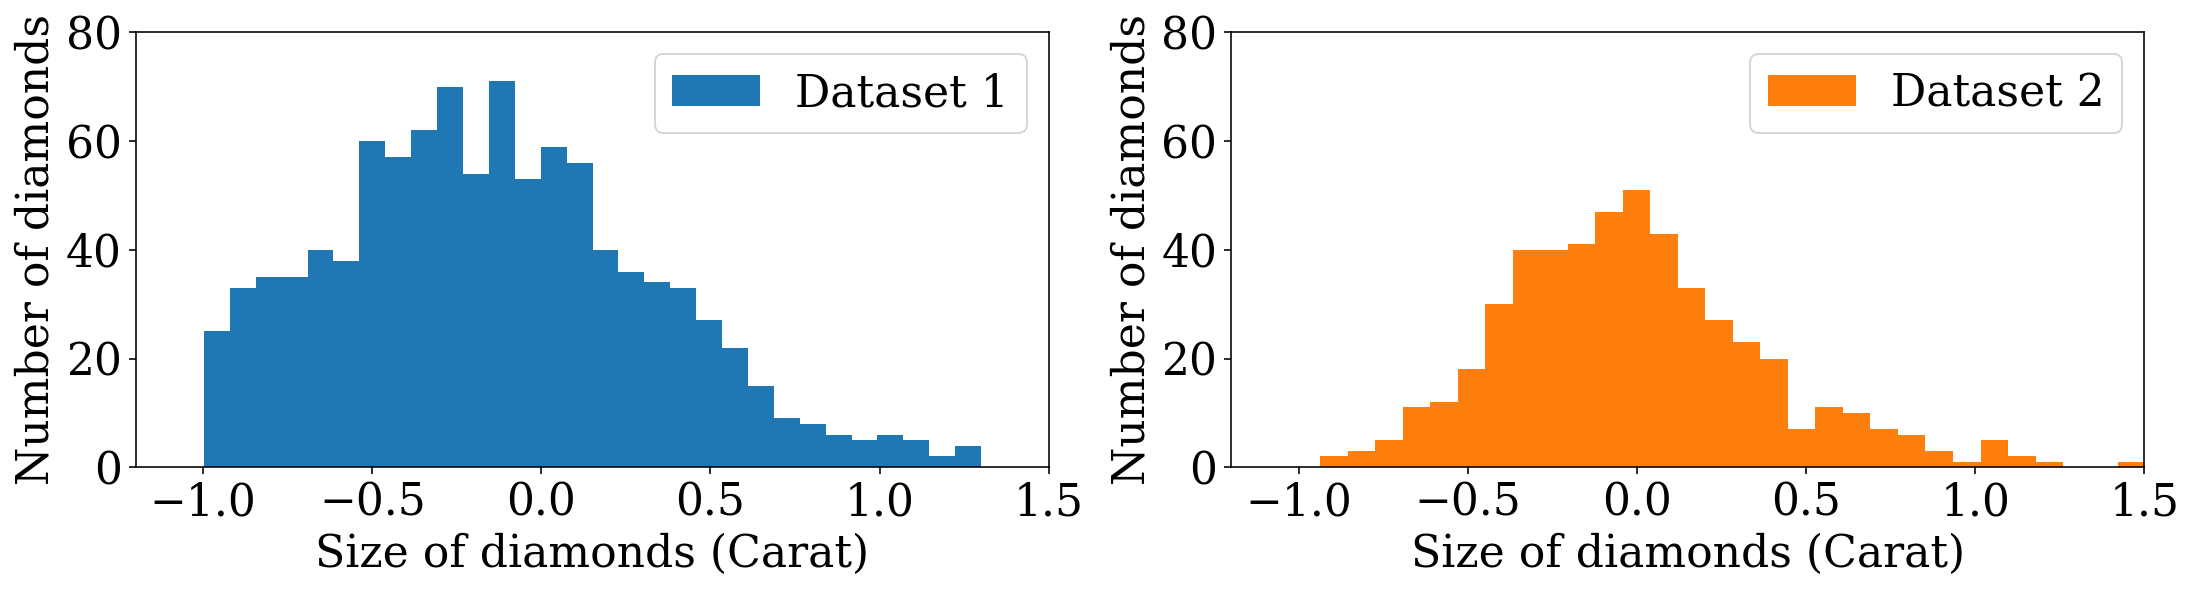

In [ ]:
plt.figure(figsize = [18,4])
ax = plt.subplot(1, 2, 1)
plt.hist(np.log10(diamond_dataset1),bins = 30,label = 'Dataset 1',color = 'C0')
plt.xlim(-1.2,1.5)
plt.ylim(0,80)

plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.legend()
ax = plt.subplot(1, 2, 2)
plt.hist(np.log10(diamond_dataset2),bins = 30,label = 'Dataset 2',color = 'C1')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.xlim(-1.2,1.5)
plt.ylim(0,80)
plt.legend()

## Summary statistics

In [ ]:
## Mean of entire datasets
print('Mean of diamond weights, dataset 1: '+str(np.round(np.mean(diamond_dataset1),2))+' ct')
print('Mean of diamond weights, dataset 2: '+str(np.round(np.mean(diamond_dataset2),2))+' ct')

Mean of diamond weights, dataset 1: 1.37 ct
Mean of diamond weights, dataset 2: 1.56 ct


In [ ]:
## Variance of entire datasets
print('Variance of diamond weights, dataset 1: '+str(np.round(np.var(diamond_dataset1),2)))
print('Variance of diamond weights, dataset 2: '+str(np.round(np.var(diamond_dataset2),2)))

Variance of diamond weights, dataset 1: 4.89
Variance of diamond weights, dataset 2: 5.7


# Plot 2: Lognormal, Pareto and mean excess quantile plots

## Lognormal quantile

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Dataset 2')

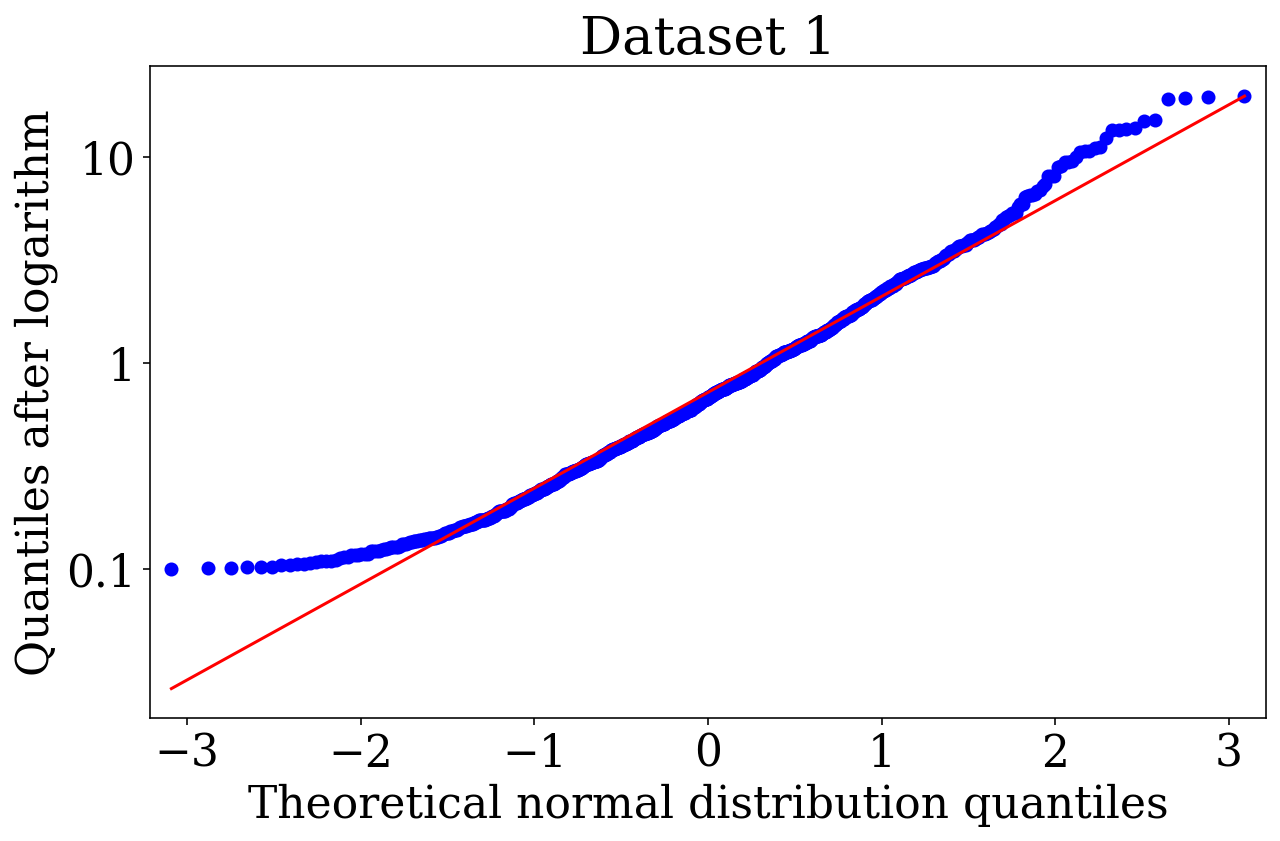

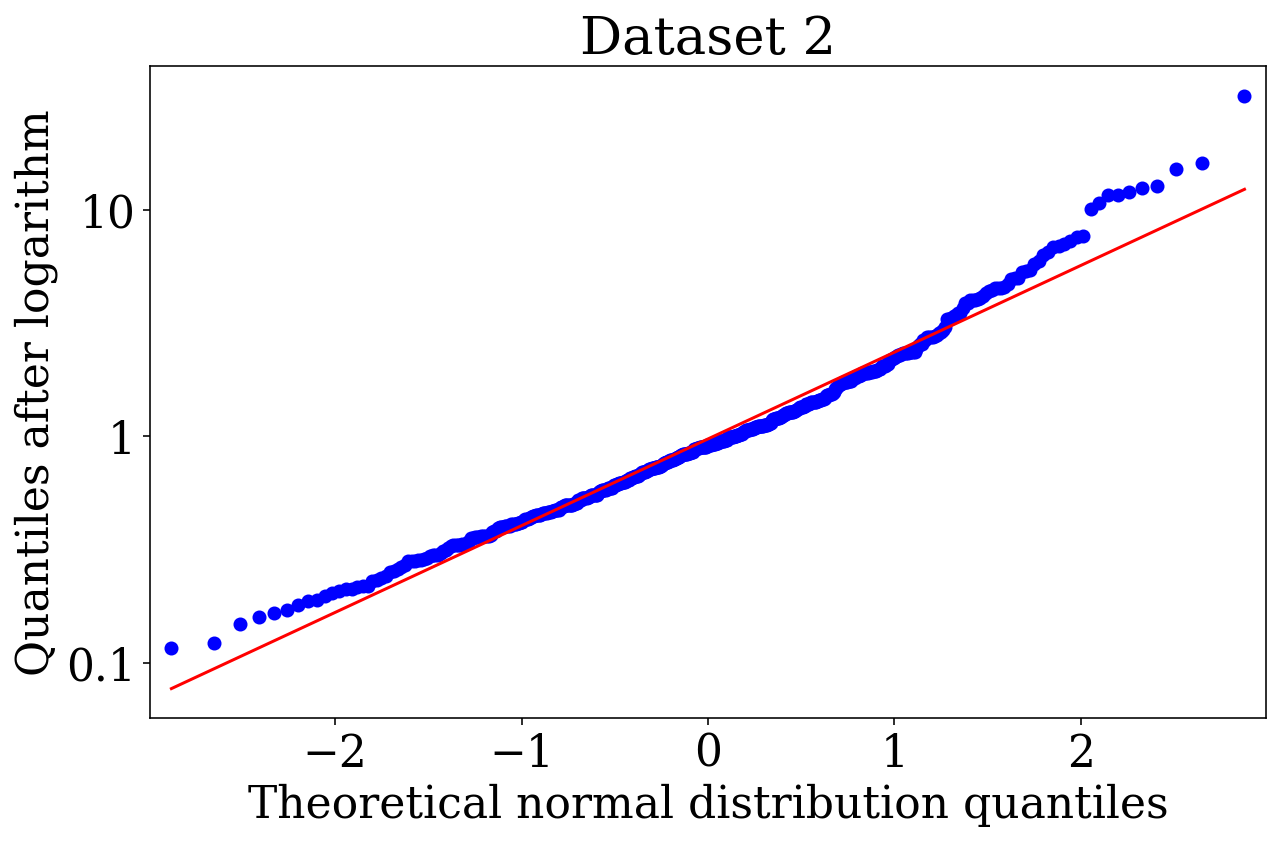

In [ ]:
from statsmodels.graphics.gofplots import qqplot
matplotlib.rc("figure", figsize=(10,6))


fig = qqplot(np.log10(diamond_dataset1), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Quantiles after logarithm')
plt.yticks([-1,0,1],[0.1,1,10])
plt.title('Dataset 1')

fig = qqplot(np.log10(diamond_dataset2), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Quantiles after logarithm')
plt.yticks([-1,0,1],[0.1,1,10])
plt.title('Dataset 2')

## Pareto quantile



In [ ]:
def pareto_quantile(data,title = None):    
    data = np.sort(data)[::-1]
    n = len(data)
    plt.scatter(-np.log((np.arange(n)+1)/(n+1)),np.log10(data),s = 10, color = 'black')
    plt.xlabel('$-\log(i/(n+1))$')
    plt.ylabel('$\log(x_i^*)$')
    plt.title(title)

([<matplotlib.axis.YTick at 0x7fc85e5d6e90>,
 [Text(0, 0, '0.1'), Text(0, 0, '1'), Text(0, 0, '10'), Text(0, 0, '100')])

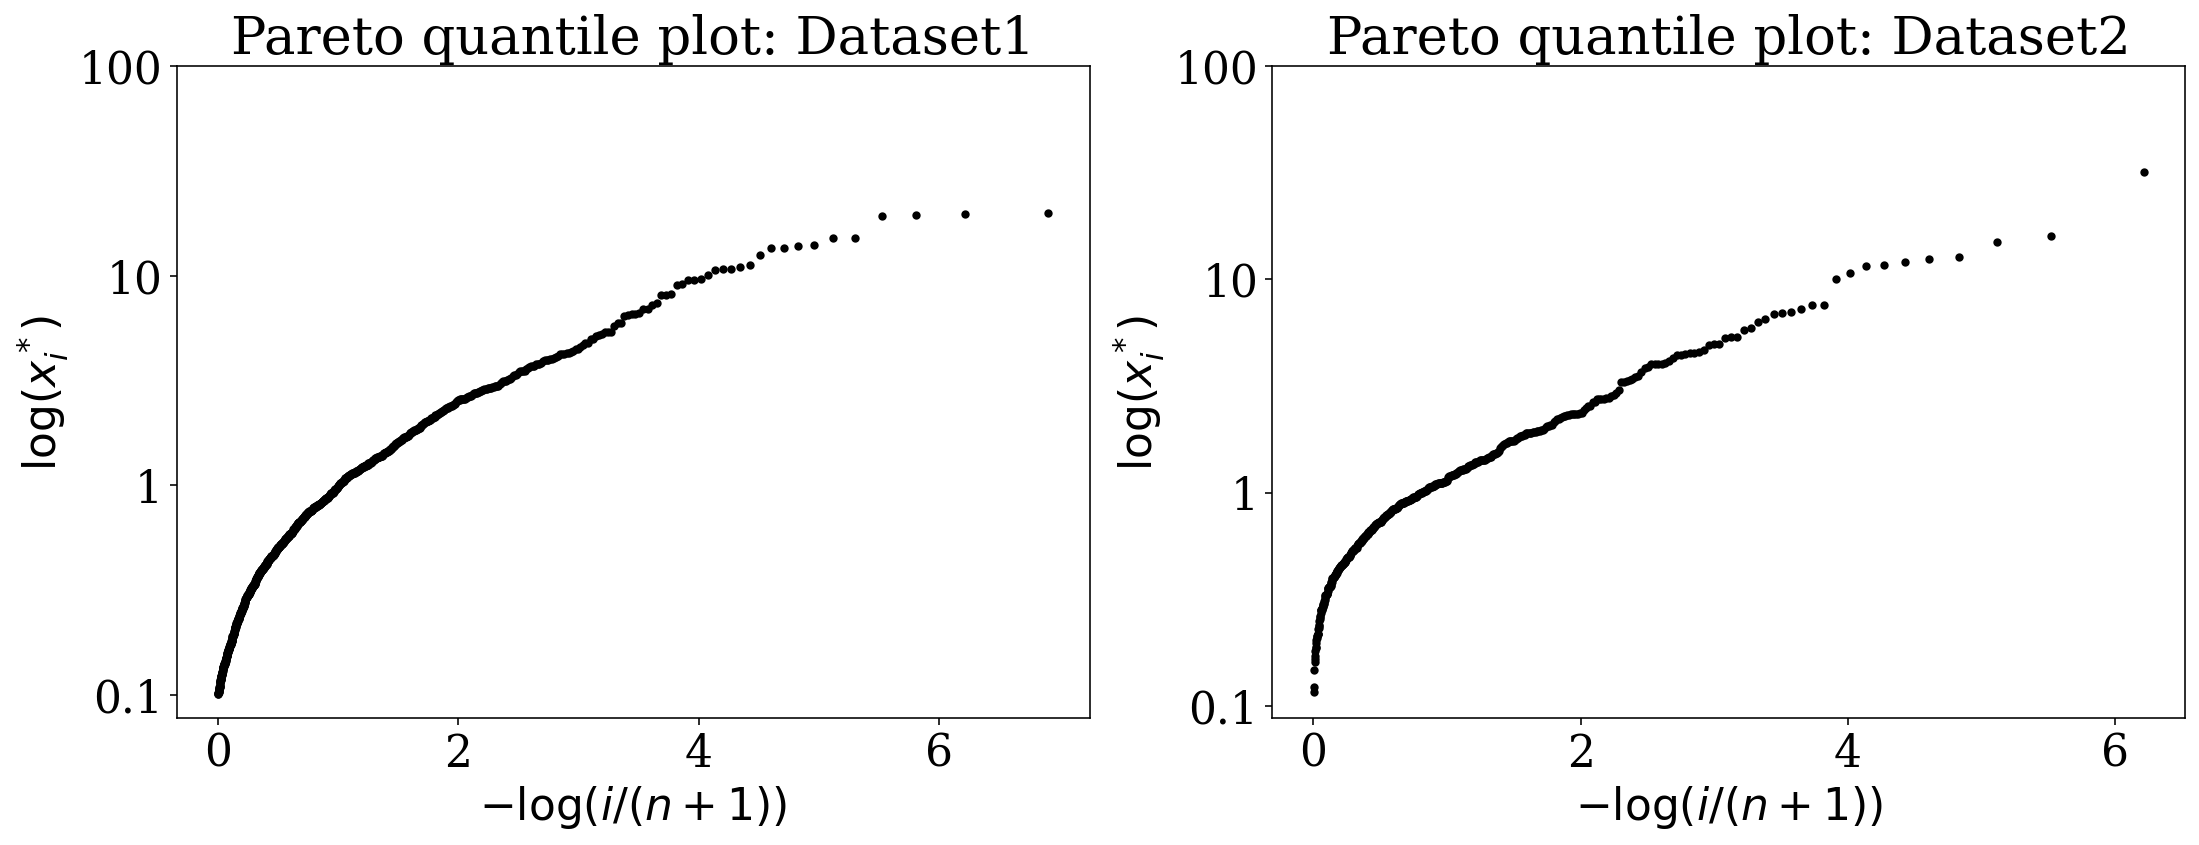

In [ ]:
matplotlib.rc("figure", figsize=(18,6))
ax = plt.subplot(1, 2, 1)
pareto_quantile(diamond_dataset1, title = 'Pareto quantile plot: Dataset1')
plt.yticks([-1,0,1,2],[0.1,1,10,100])
ax = plt.subplot(1, 2, 2)
pareto_quantile(diamond_dataset2, title = 'Pareto quantile plot: Dataset2')
plt.yticks([-1,0,1,2],[0.1,1,10,100])

## Mean excess quantile plot


In [ ]:
def mean_excess_quantile(data):
    data = np.sort(data)[::-1]
    n = len(data)
    log_mean_excess = np.zeros(n)
    log_mean_excess[:] = np.nan
    for k in np.arange(1,len(data)):
        log_mean_excess[k] = np.log10(np.mean(data[:k]) - data[k])
    log_quantile = -np.log10((np.arange(n)+1)/(n+1))
    return log_mean_excess,log_quantile

Text(0.5, 1.0, 'Mean excess quantile plot: Dataset2')

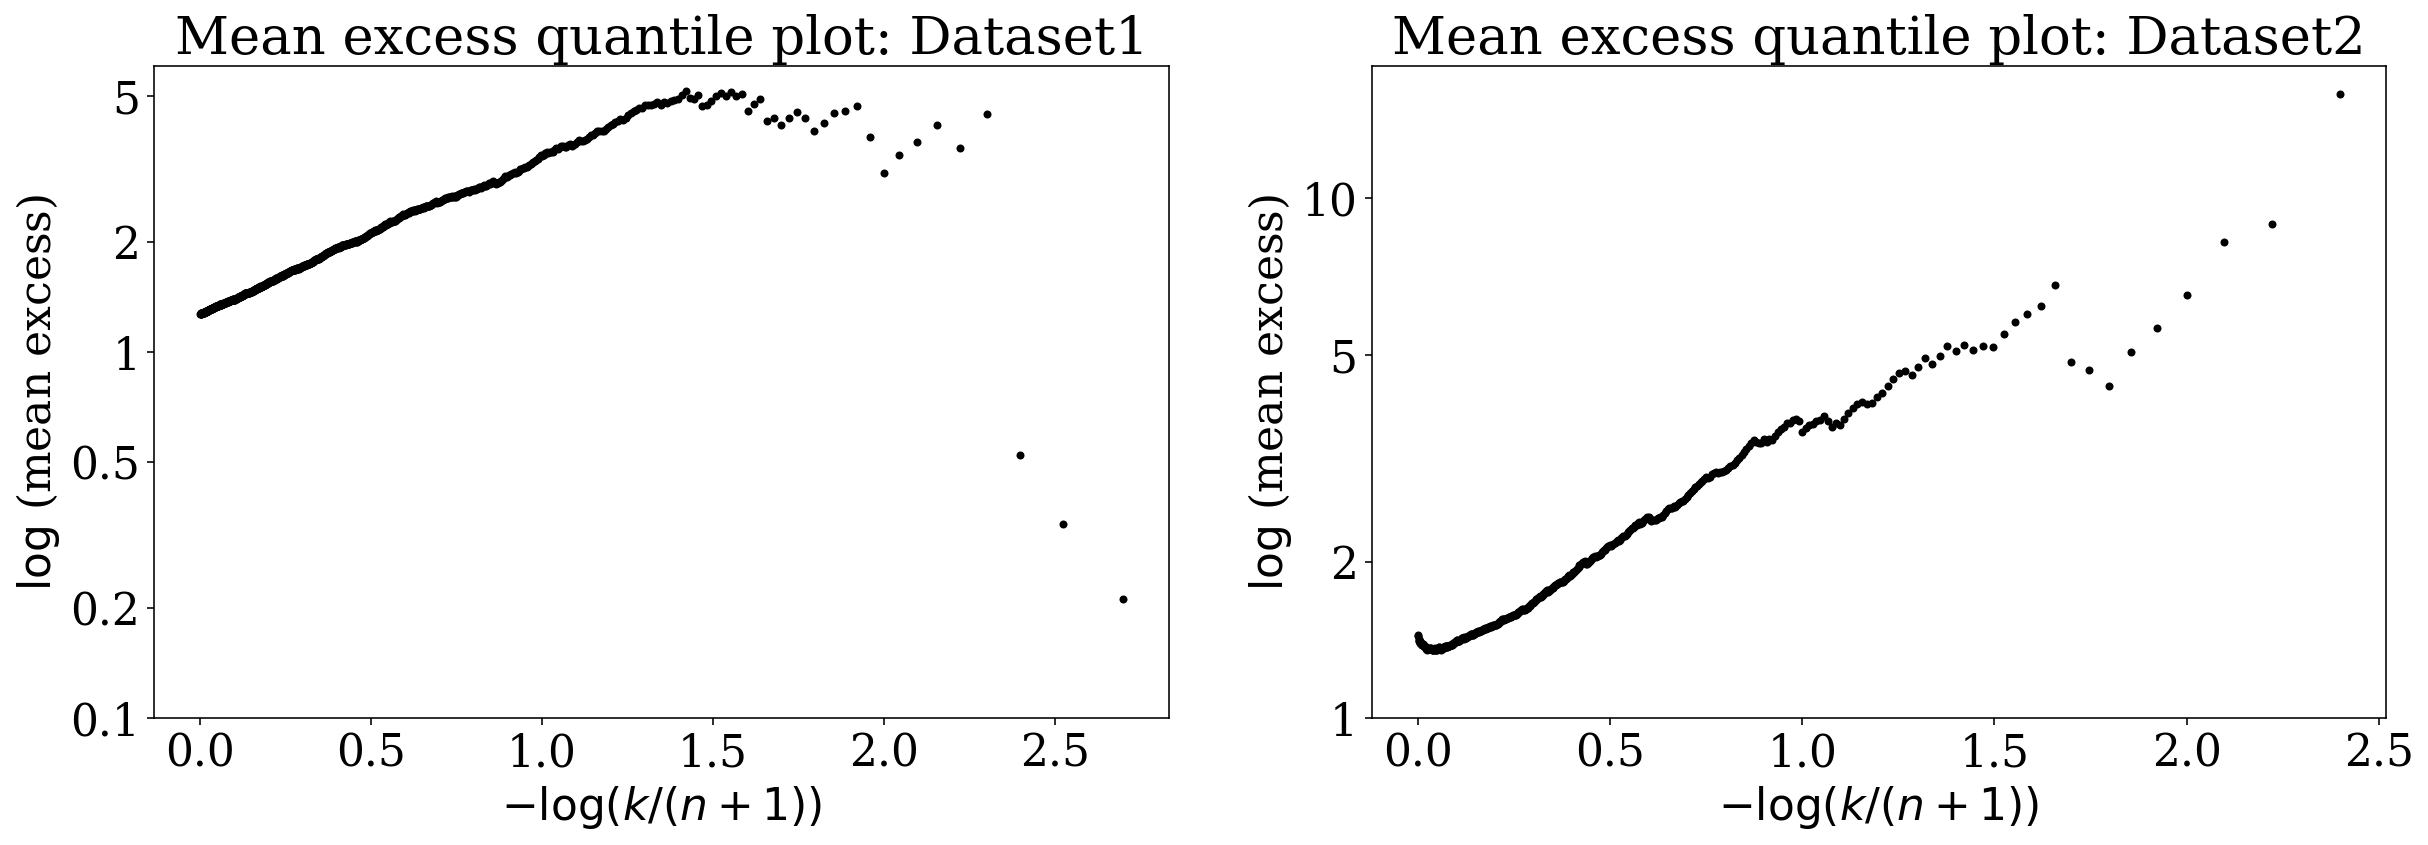

In [ ]:
matplotlib.rc("figure", figsize=(20,6))
ax = plt.subplot(1, 2, 1)

log_mean_excess,log_quantile = mean_excess_quantile(diamond_dataset1)

plt.plot(log_quantile,log_mean_excess,'.',color = 'black')
plt.xlabel('$-\log(k/(n+1))$')
plt.ylabel('$\log$ (mean excess)')
plt.yticks([-1,np.log10(0.2), np.log10(0.5),0,np.log10(2),np.log10(5)],[0.1,0.2,0.5,1,2,5])
plt.title('Mean excess quantile plot: Dataset1')

ax = plt.subplot(1, 2, 2)

log_mean_excess,log_quantile = mean_excess_quantile(diamond_dataset2)

plt.plot(log_quantile,log_mean_excess,'.',color = 'black')
plt.xlabel('$-\log(k/(n+1))$')
plt.ylabel('$\log$ (mean excess)')
plt.yticks([ 0,np.log10(2),np.log10(5),1],[1,2,5,10])
plt.title('Mean excess quantile plot: Dataset2')



## Use these diagnostic tools to get insight into the dataset


*   Are small values behaving differently from large?   
    Yes, small values do not follow the lognormal distribution, especially for Dataset 1.   
*   What happens for large values in these quantile plots?   
    * Lognormal quantile indicates large values from Dataset 1 might follow the lognormal distribution.    
    * Parteo quantile shows a clear linear behavior of large values from Dataset 2.  
    * Mean excess quantile show the extreme value index $\xi$ of Dataset 1 might be negative, $\xi$ of Dataset 2 might be positive. 
*   Can you eye-ball a threshold $u$ above which a linear pattern emerges? (Guesstimate, you can make your own guess) 
    * Parteo quantile, Dataset 2: u = 2
    * Mean excess quantile: u = 1.1



# Plot 3: Estimation of $ξ$ as function of the threshold


## Use Pareto quantile for Dataset 2 to estimate $\xi$



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data = diamond_dataset2
data = np.sort(data)[::-1]

u = 2
n = len(data)
X = -np.log((np.arange(n)+1)/(n+1))
X = X.reshape(-1,1)
y = np.log10(data)
idx = np.int(np.where(X>u)[0][-1])

Text(4, 0, '$\\hat{ξ}  = $0.29')

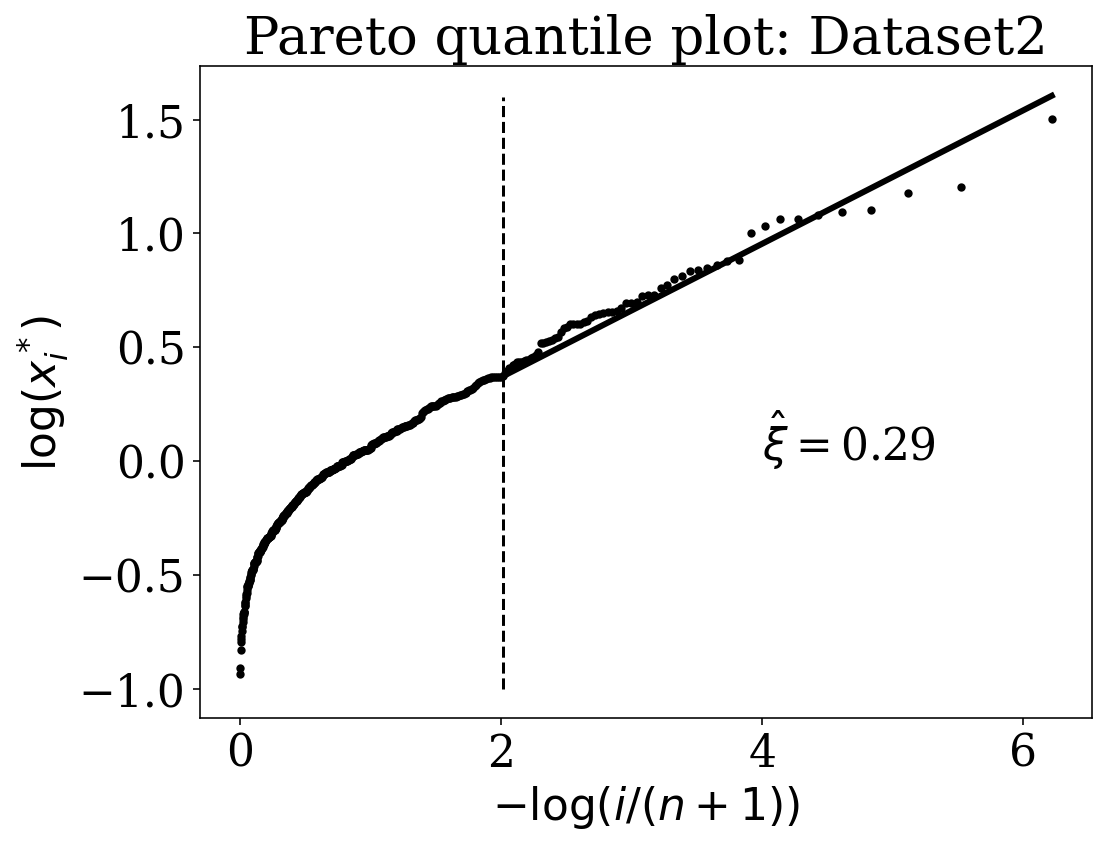

In [ ]:
matplotlib.rc("figure", figsize=(8,6))
reg = LinearRegression(fit_intercept = False).fit(X[:idx,:]-X[idx,:],y[:idx]-y[idx])
pareto_quantile(diamond_dataset2, title = 'Pareto quantile plot: Dataset2')
plt.plot(X[:idx,:],reg.predict(X[:idx,:]-X[idx,:])+y[idx],'-',linewidth = 3,color = 'black')
plt.vlines(x = X[idx,:],ymin = -1,ymax = 1.6,linestyle = '--')
plt.text(4,0,'$\hat{\u03BE}  = $'+str(np.round(reg.coef_[0],2)))

## Use mean excess quantile for Dataset 1 and 2 to estimate $\xi$


Dataset 2

In [ ]:
data = diamond_dataset2
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
y = log_mean_excess
idx = np.int(np.where(X>u)[0][-1])

Text(1.5, 0, '$\\hat{ξ}  = $0.34')

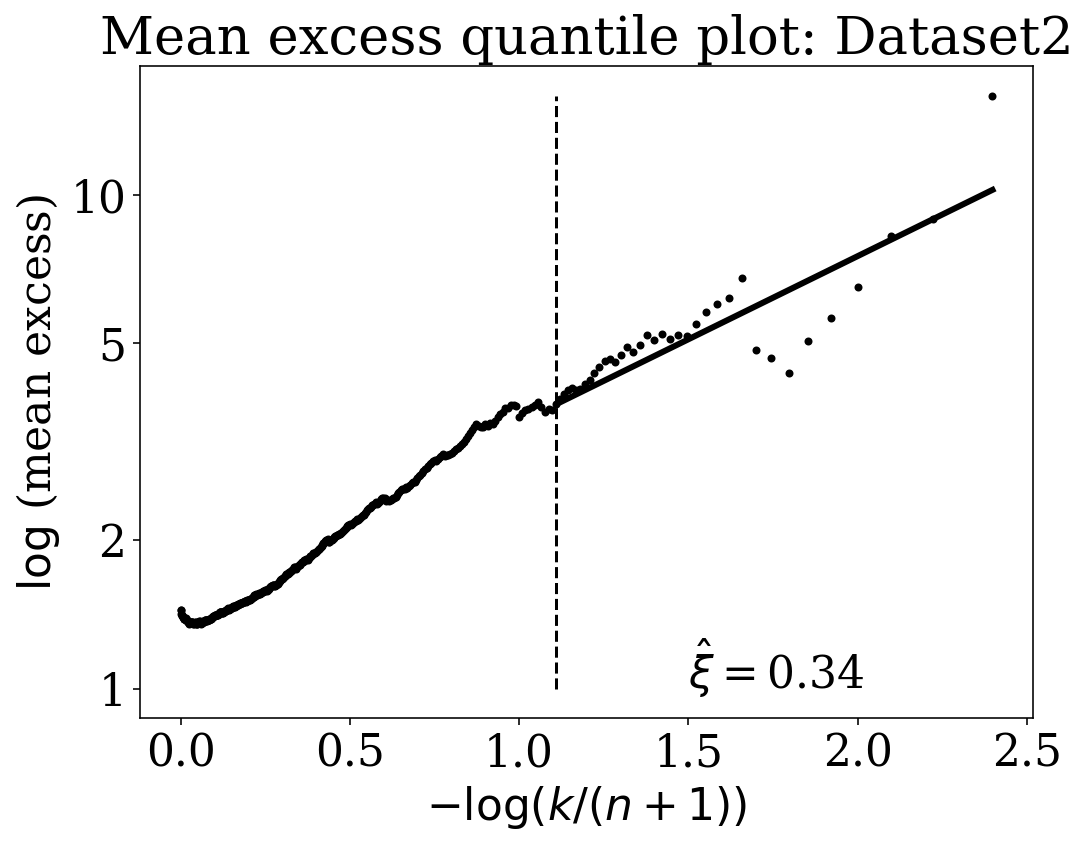

In [ ]:
plt.plot(log_quantile,log_mean_excess,'.',color = 'black')
plt.xlabel('$-\log(k/(n+1))$')
plt.ylabel('$\log$ (mean excess)')
plt.yticks([ 0,np.log10(2),np.log10(5),1],[1,2,5,10])
plt.title('Mean excess quantile plot: Dataset2')

reg = LinearRegression(fit_intercept = False).fit(X[1:idx,:]-X[idx,:],y[1:idx]-y[idx])
plt.plot(X[1:idx,:],reg.predict(X[1:idx,:]-X[idx,:])+y[idx],'-',linewidth = 3,color = 'black')
plt.vlines(x = X[idx,:],ymin = -0,ymax = 1.2,linestyle = '--')
plt.text(1.5,0,'$\hat{\u03BE}  = $'+str(np.round(reg.coef_[0],2)))

Dataset 1

In [ ]:
data = diamond_dataset1
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
y = log_mean_excess
idx = np.int(np.where(X>u)[0][-1])

Text(1.5, 0, '$\\hat{ξ}  = $-0.12')

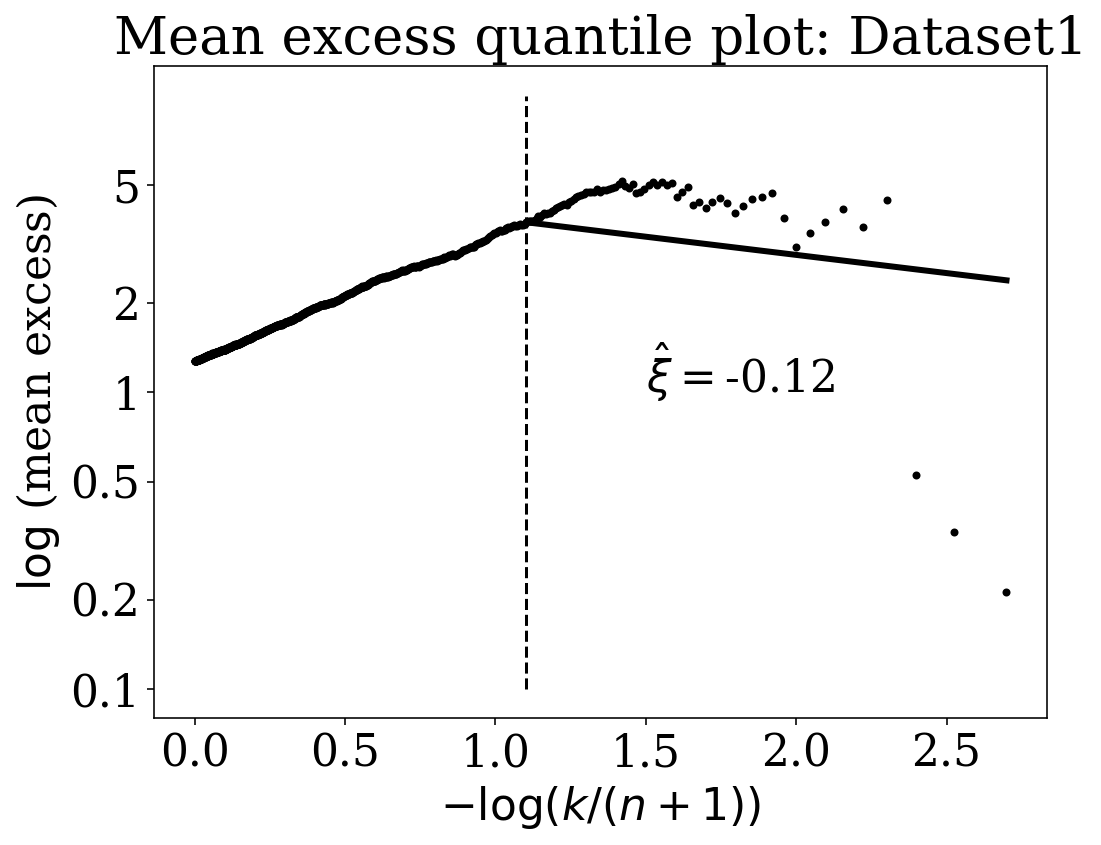

In [ ]:
plt.plot(log_quantile,log_mean_excess,'.',color = 'black')
plt.xlabel('$-\log(k/(n+1))$')
plt.ylabel('$\log$ (mean excess)')
plt.yticks([-1,np.log10(0.2), np.log10(0.5),0,np.log10(2),np.log10(5)],[0.1,0.2,0.5,1,2,5])
plt.title('Mean excess quantile plot: Dataset1')

reg = LinearRegression(fit_intercept = False).fit(X[1:idx,:]-X[idx,:],y[1:idx]-y[idx])
plt.plot(X[1:idx,:],reg.predict(X[1:idx,:]-X[idx,:])+y[idx],'-',linewidth = 3,color = 'black')
plt.vlines(x = X[idx,:],ymin = -1,ymax = 1,linestyle = '--')
plt.text(1.5,0,'$\hat{\u03BE}  = $'+str(np.round(reg.coef_[0],2)))

# Plot 4: Histogram of bootstrap estimates of $\xi$



## Bootstrap, Pareto quantile, Dataset 2 

Text(0, 0.5, 'number of bootstrap')

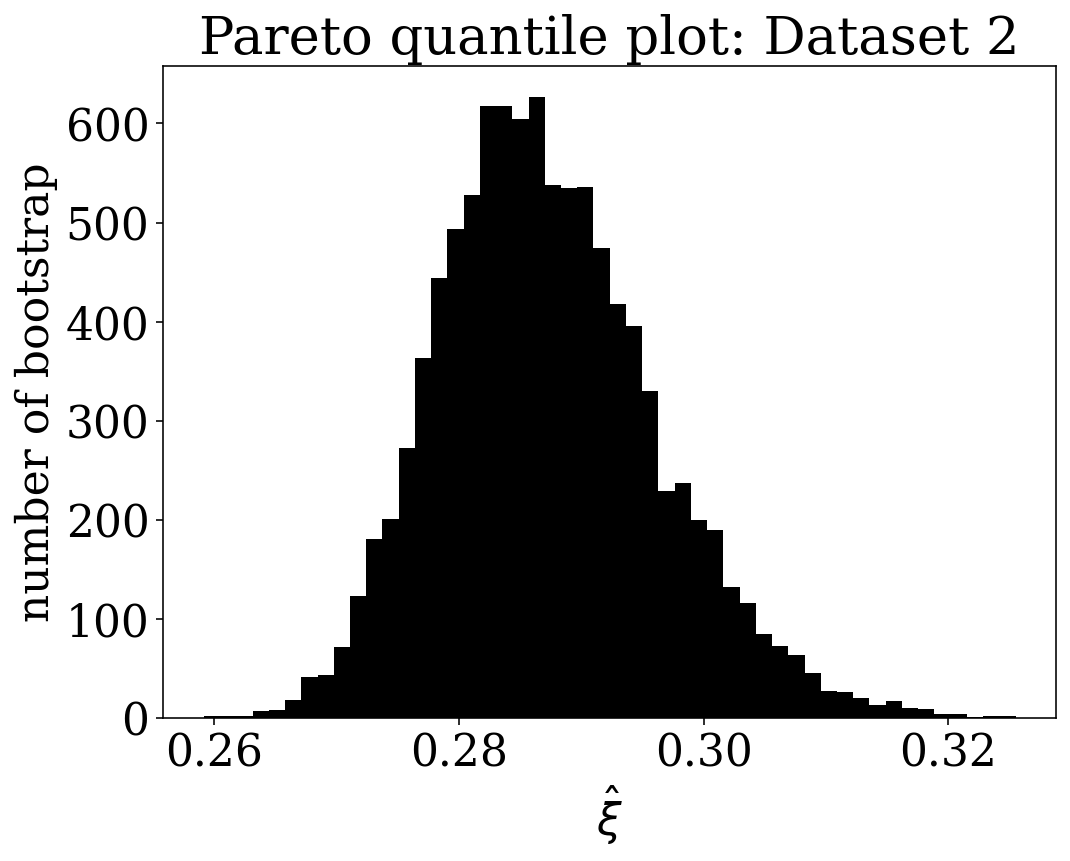

In [ ]:
data = diamond_dataset2
data = np.sort(data)[::-1]

u = 2
n = len(data)
X = -np.log((np.arange(n)+1)/(n+1))
X = X.reshape(-1,1)
y = np.log10(data)
idx = np.int(np.where(X>u)[0][-1])

X = X[:idx,:]
y = y[:idx]
m = len(y)


b = 10000
xi = np.zeros(b)

for i in range(b):
    sample_int = np.random.randint(m, size=m)
    max_index = np.max(sample_int)
    reg = LinearRegression(fit_intercept = False).fit(X[sample_int,:]-X[max_index,:],y[sample_int]-y[max_index])
    xi[i] = reg.coef_[0]

plt.hist(xi,bins = 50,color = 'black')
plt.title('Pareto quantile plot: Dataset 2')
plt.xlabel('$\hat{\u03BE}$')
plt.ylabel('number of bootstrap')

## Bootstrap, mean excess quantile, Dataset 2 

(-0.1, 0.5)

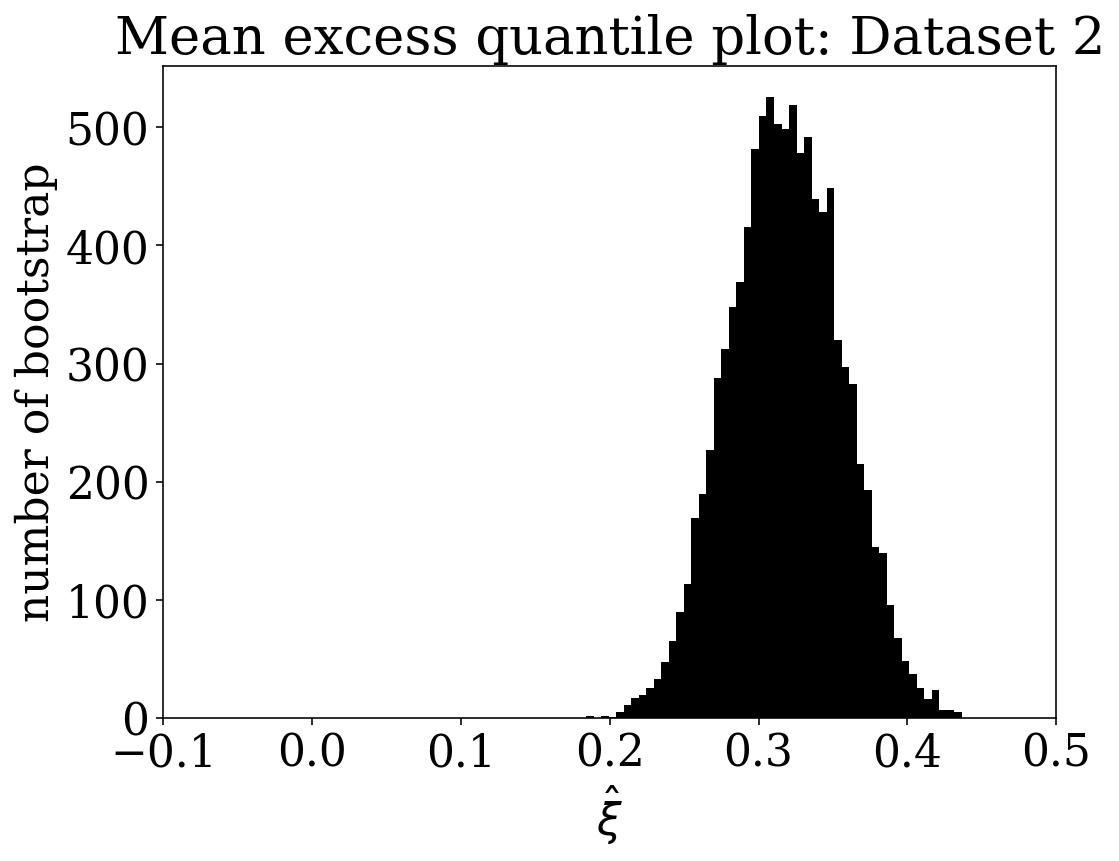

In [ ]:
data = diamond_dataset2
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
idx = np.int(np.where(X>u)[0][-1])
X = X[1:idx,:]
y = log_mean_excess[1:idx]
m = len(y)

b = 10000
xi = np.zeros(b)

for i in range(b):
    sample_int = np.random.randint(m, size=m)
    max_index = np.max(sample_int)
    reg = LinearRegression(fit_intercept = False).fit(X[sample_int,:]-X[max_index,:],y[sample_int]-y[max_index])
    xi[i] = reg.coef_[0]

plt.hist(xi,bins = 50,color = 'black')
plt.title('Mean excess quantile plot: Dataset 2')
plt.xlabel('$\hat{\u03BE}$')
plt.ylabel('number of bootstrap')
plt.xlim(-0.1,0.5)

## Bootstrap, mean excess quantile, Dataset 1

Text(0, 0.5, 'number of bootstrap')

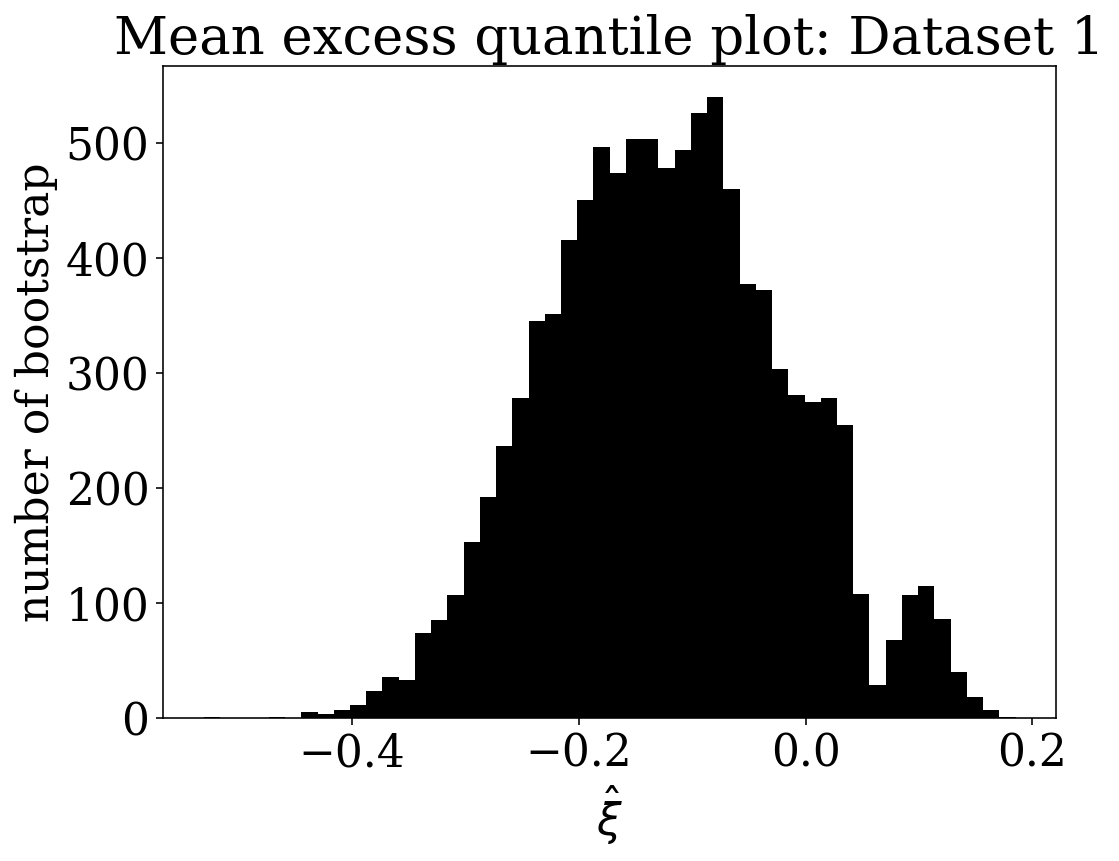

In [ ]:
data = diamond_dataset1
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
idx = np.int(np.where(X>u)[0][-1])
X = X[1:idx,:]
y = log_mean_excess[1:idx]
m = len(y)

b = 10000
xi = np.zeros(b)

for i in range(b):
    sample_int = np.random.randint(m, size=m)
    max_index = np.max(sample_int)
    reg = LinearRegression(fit_intercept = False).fit(X[sample_int,:]-X[max_index,:],y[sample_int]-y[max_index])
    xi[i] = reg.coef_[0]

plt.hist(xi,bins = 50,color = 'black')
plt.title('Mean excess quantile plot: Dataset 1')
plt.xlabel('$\hat{\u03BE}$')
plt.ylabel('number of bootstrap')

# Plot 5: Histogram of data overlayed with fitted GPD

## Dataset 1, the possibility of $\xi$ < 0 is 86% (from the bootstrap result). 

In [ ]:
from scipy.stats import genpareto

In [ ]:
data = diamond_dataset1
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
idx = np.int(np.where(X>u)[0][-1])
threshold = data[idx]

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


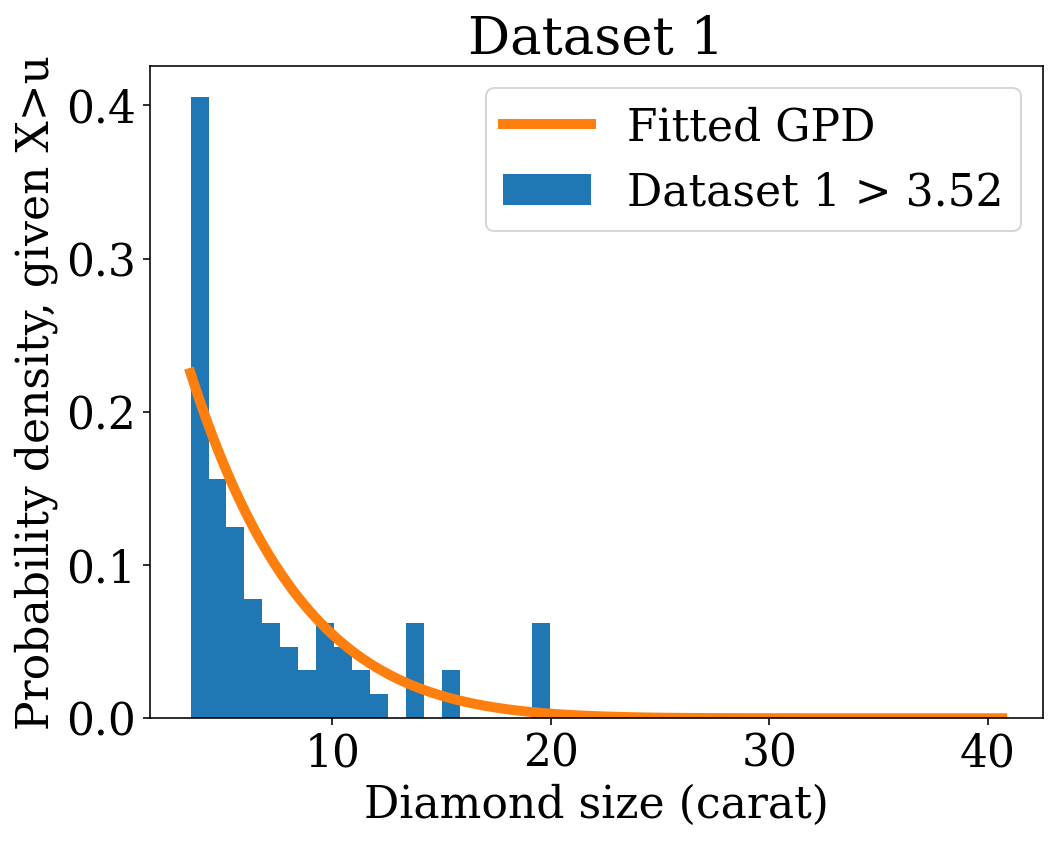

In [ ]:
fitted_xi = -0.12
xi, mu, sigma = genpareto.fit(data[:idx]-threshold,fc = fitted_xi, floc = 0)

maximum = np.linspace(0,100,1000)[np.where(genpareto.pdf(np.linspace(0,100,1000), 
                                                         xi, mu, sigma)==0)[0][1]]
plt.hist(data[:idx], density  = True, label = 'Dataset 1 > '+str(np.round(threshold,2)),bins = 20)
plt.plot(np.linspace(threshold,maximum+threshold,1000),genpareto.pdf(np.linspace(0,maximum,1000), xi, mu, sigma),label = 'Fitted GPD',linewidth = 5)

plt.xlabel('Diamond size (carat)')
plt.ylabel('Probability density, given X>u')
plt.title('Dataset 1')
plt.legend()

Maximum of the fitted GPD distribution

In [ ]:
print('Maximum of the fitted GPD for Dataset 1: '+str(np.round(maximum+threshold,2))+' (Carat)')

Maximum of the fitted GPD for Dataset 1: 40.66 (Carat)


Probability of diamonds > 40 (carat):

$$P(X>40) = P(X>40|X>u)*P(X>u)$$
Note here $P(X\leq x|X>u)$ is the pdf of the fitted GPD. 

In [ ]:
# P(X>40|X>u)
(1-genpareto.cdf(40-threshold, xi, mu, sigma))

# P(X>u)
np.mean(data>threshold)

# P(X>40) = P(X>40|X>u)*P(X>u)
p = (1-genpareto.cdf(40-threshold, xi, mu, sigma))*np.mean(data>threshold)

print('probability of observing a stone larger than 40ct for Dataset 1: '+str(p))

probability of observing a stone larger than 40ct for Dataset 1: 1.7319479184152442e-17


## Dataset 2,  $\xi$ > 0

In [ ]:
data = diamond_dataset2
data = np.sort(data)[::-1]

log_mean_excess,log_quantile = mean_excess_quantile(data)

u = 1.1
n = len(data)
X = log_quantile.reshape(-1,1)
idx = np.int(np.where(X>u)[0][-1])
threshold = data[idx]

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


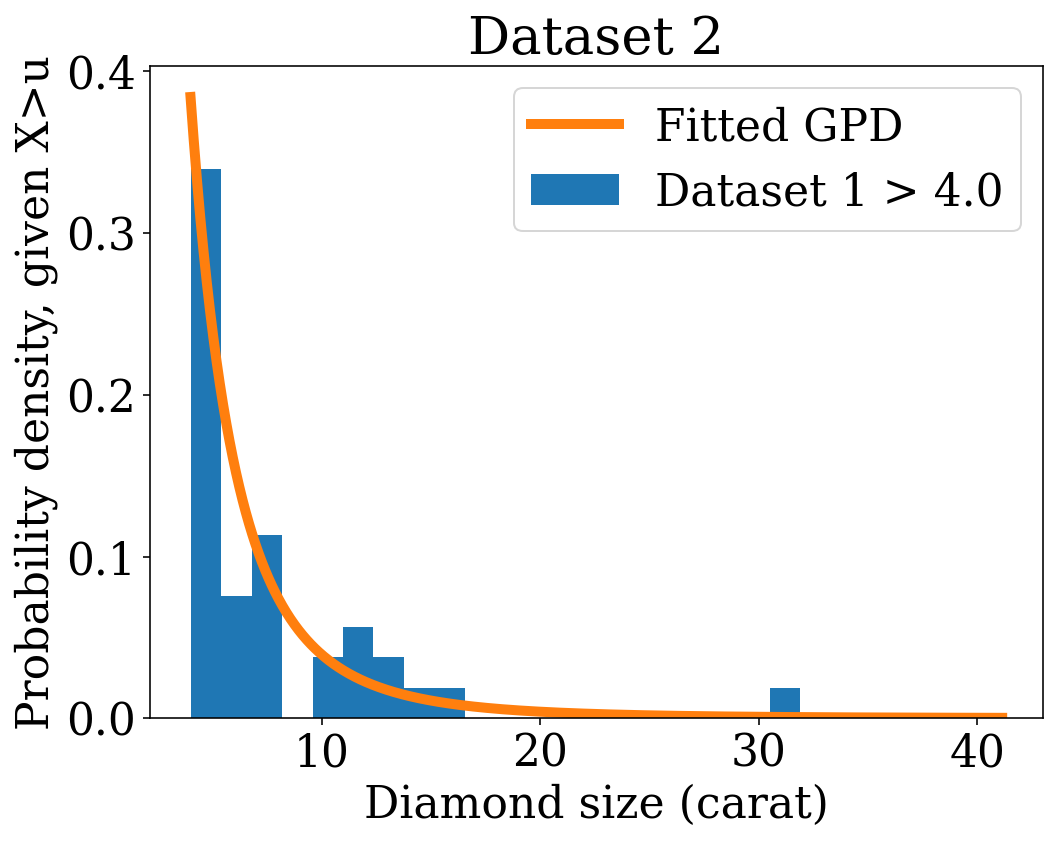

In [ ]:
fitted_xi = 0.29
xi, mu, sigma = genpareto.fit(data[:idx]-threshold,fc = fitted_xi, floc = 0)

plt.hist(data[:idx], density  = True, label = 'Dataset 1 > '+str(np.round(threshold,2)),bins = 20)
plt.plot(np.linspace(threshold,maximum+threshold,1000),genpareto.pdf(np.linspace(0,maximum,1000), xi, mu, sigma),label = 'Fitted GPD',linewidth = 5)

plt.xlabel('Diamond size (carat)')
plt.ylabel('Probability density, given X>u')
plt.title('Dataset 2')
plt.legend()


In [ ]:
# P(X>40|X>u)
(1-genpareto.cdf(40-threshold, xi, mu, sigma))

# P(X>u)
np.mean(data>threshold)

# P(X>40) = P(X>40|X>u)*P(X>u)
p = (1-genpareto.cdf(40-threshold, xi, mu, sigma))*np.mean(data>threshold)

print('probability of observing a stone larger than 40ct for Dataset 2: '+str(p))

probability of observing a stone larger than 40ct for Dataset 2: 0.0002933155832486274
